# Compartmental model



## SI Model

In [0]:
def SI_model(y,t,beta):
  s = y[0]
  i = y[1]
  ds_dt = -beta * s * i  
  di_dt = beta * s * i
  return ([ds_dt,di_dt])

In [0]:
#initial conditions
s0 = 0.99
i0 = 0.01
beta = 0.1

#Time vector
t= np.arange(0,101)

#Result
solution = scipy.integrate.odeint(SI_model,[s0,i0],t,args=(beta,))
solution = np.array(solution)

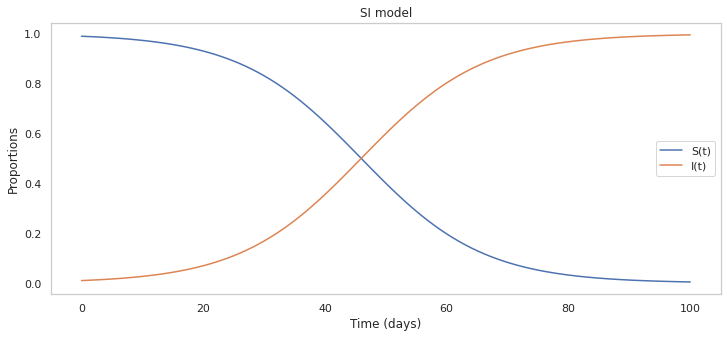

In [0]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="S(t)")
plt.plot(t,solution[:,1],label ="I(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SI model")
plt.show()

## SIS model

In [0]:
def SIS_model(y,t,beta,gamma):
  s = y[0]
  i = y[1]
  ds_dt = -beta * s * i + gamma * i 
  di_dt = beta * s * i - gamma * i
  return ([ds_dt,di_dt])

In [0]:
#initial conditions
s0 = 0.99
i0 = 0.01
beta = 0.25
gamma = 0.1

#Time vector
t= np.arange(0,101)

#Result
solution = scipy.integrate.odeint(SIS_model,[s0,i0],t,args=(beta,gamma))
solution = np.array(solution)

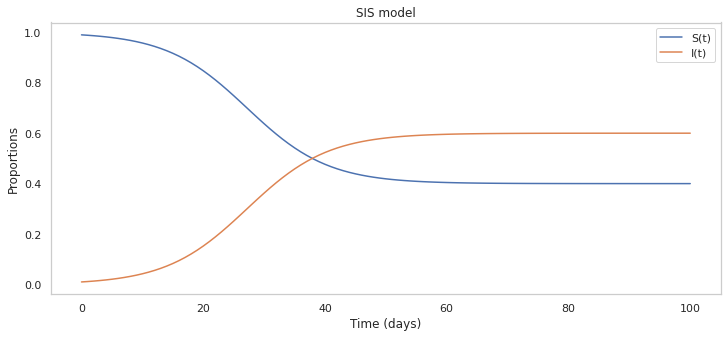

In [0]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="S(t)")
plt.plot(t,solution[:,1],label ="I(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIS model")
plt.show()

## SIR model

In [0]:
def SIR_model(y,t,beta,gamma):
  s = y[0]
  i = y[1]
  r = y[2]
  ds_dt = -beta * s * i  
  di_dt = beta * s * i  - gamma*i
  dr_dt = gamma * i
  return ([ds_dt,di_dt,dr_dt])

In [0]:
#initial conditions
s0 = 1
i0 = 0.000001
r0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t= np.arange(0,200)

#Result
solution = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution = np.array(solution)

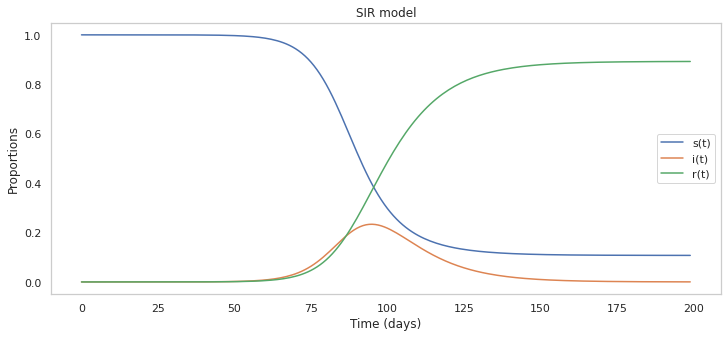

In [0]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
plt.plot(t,solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

#### Different R_0

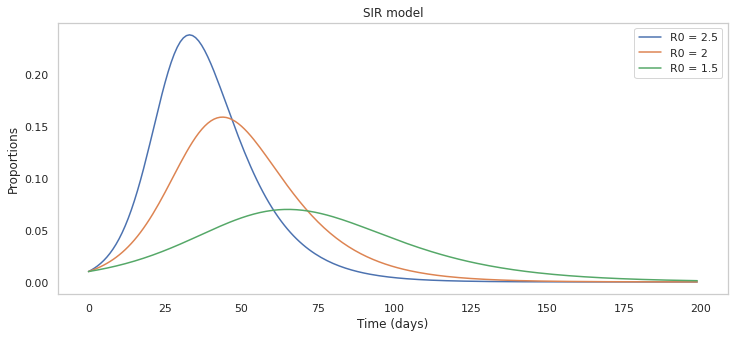

In [0]:
#initial conditions
s0 = 0.99
i0 = 0.01
r0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t= np.arange(0,200)

#Result
solution_1 = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution_1 = np.array(solution_1)

beta = 0.2
solution_2 = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution_2 = np.array(solution_2)


beta = 0.15
solution_3 = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution_3 = np.array(solution_3)

#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution_1[:,1],label ="R0 = 2.5")
plt.plot(t,solution_2[:,1],label ="R0 = 2")
plt.plot(t,solution_3[:,1],label ="R0 = 1.5")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

#### Intervention


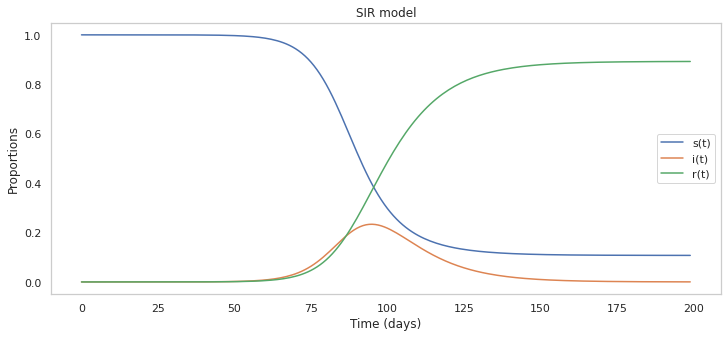

In [0]:
#initial conditions
s0 = 1
i0 = 0.000001
r0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t= np.arange(0,200)

#Result
solution = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t,args=(beta,gamma))
solution = np.array(solution)

#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
plt.plot(t,solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

Intervene on day 75

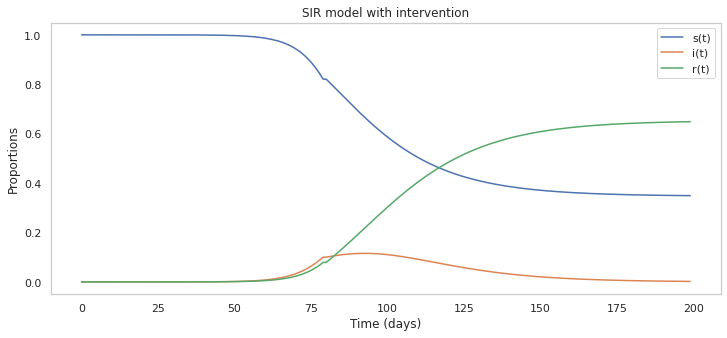

In [0]:
#initial conditions
s0 = 1
i0 = 0.000001
r0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t_before= np.arange(0,80)

#Result
solution_before = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t_before,args=(beta,gamma))
solution_before = np.array(solution_before)

s0 = solution_before[-1,0]
i0 = solution_before[-1,1]
r0 = solution_before[-1,2]
beta = 0.15
t_after=np.arange(0,120)
solution_after = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t_after,args=(beta,gamma))
solution_after = np.array(solution_after)

merge_solution = np.concatenate((solution_before,solution_after))
merge_t = np.arange(0,len(t_before)+len(t_after))
#plot
plt.figure(figsize=(12,5))
plt.plot(merge_t,merge_solution[:,0],label ="s(t)")
plt.plot(merge_t,merge_solution[:,1],label ="i(t)")
plt.plot(merge_t,merge_solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model with intervention")
plt.show()

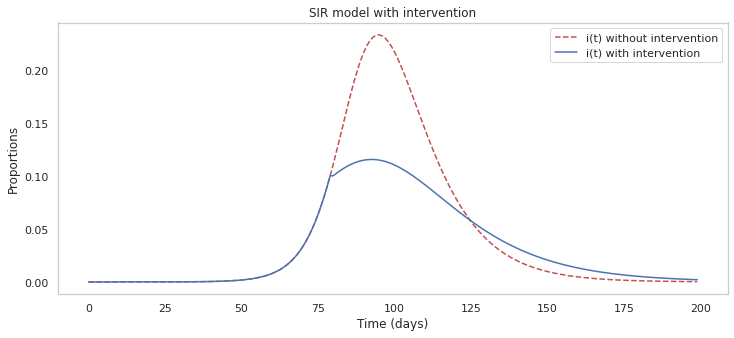

In [0]:
#plot
plt.figure(figsize=(12,5))
plt.plot(merge_t,solution[:,1],'--r',label ="i(t) without intervention")
plt.plot(merge_t,merge_solution[:,1],'b',label ="i(t) with intervention")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model with intervention")
plt.show()

Intervene on day 100

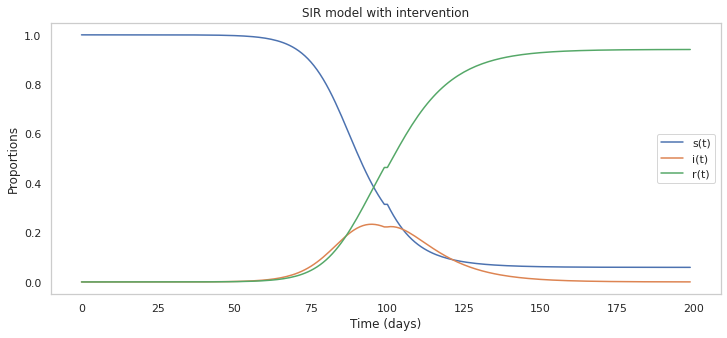

In [0]:
#initial conditions
s0 = 1
i0 = 0.000001
r0 = 0.0
beta = 0.25
gamma = 0.1

#Time vector
t_before= np.arange(0,100)

#Result
solution_before = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t_before,args=(beta,gamma))
solution_before = np.array(solution_before)

s0 = solution_before[-1,0]
i0 = solution_before[-1,1]
r0 = solution_before[-1,2]
beta = 0.35
t_after=np.arange(0,100)
solution_after = scipy.integrate.odeint(SIR_model,[s0,i0,r0],t_after,args=(beta,gamma))
solution_after = np.array(solution_after)

merge_solution = np.concatenate((solution_before,solution_after))
merge_t = np.arange(0,len(t_before)+len(t_after))
#plot
plt.figure(figsize=(12,5))
plt.plot(merge_t,merge_solution[:,0],label ="s(t)")
plt.plot(merge_t,merge_solution[:,1],label ="i(t)")
plt.plot(merge_t,merge_solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model with intervention")
plt.show()

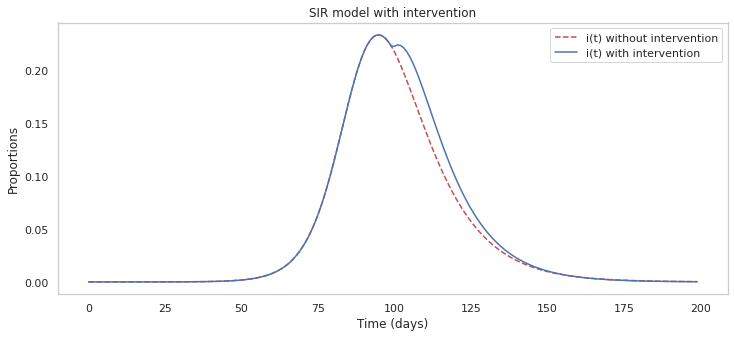

In [0]:
#plot
plt.figure(figsize=(12,5))
plt.plot(merge_t,solution[:,1],'--r',label ="i(t) without intervention")
plt.plot(merge_t,merge_solution[:,1],'b',label ="i(t) with intervention")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR model with intervention")
plt.show()

## SEIR model


In [0]:
def SEIR_model(y,t,beta,gamma,sigma):
  s = y[0]
  e = y[1]
  i = y[2]
  r = y[3]
  ds_dt = -beta * s * i
  de_dt = beta * s * i  - sigma*e 
  di_dt = sigma*e -gamma*i
  dr_dt = gamma * i
  return ([ds_dt,de_dt,di_dt,dr_dt])

In [0]:
#initial conditions
s0 = 0.999999
e0 = 0.000001
i0 = 0
r0 = 0.0
beta = 0.44
gamma = 0.2
sigma = 0.2
#Time vector
t= np.arange(0,201)

#Result
solution = scipy.integrate.odeint(SEIR_model,[s0,e0,i0,r0],t,args=(beta,gamma,sigma))
solution = np.array(solution)

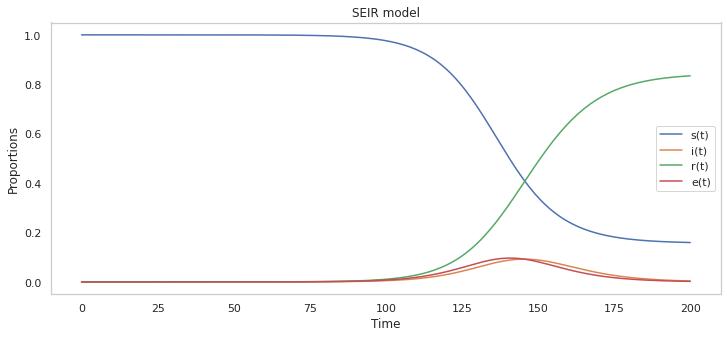

In [0]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")

plt.plot(t,solution[:,2],label ="i(t)")
plt.plot(t,solution[:,3],label ="r(t)")
plt.plot(t,solution[:,1],label ="e(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SEIR model")
plt.show()

### SIR model in frequency 

In [0]:
def SIR_model_freq(y,t,beta,gamma):
  S = y[0]
  I = y[1]
  R = y[2]
  N = S + I + R
  dS_dt = -beta *S * I / (N)  
  dI_dt = beta * S * I / (N)  - gamma*I
  dR_dt = gamma * I
  return ([dS_dt,dI_dt,dR_dt])

In [0]:
#initial conditions (in frequency)
S0 = 5000
I0 = 2
R0 = 0.0
beta = 0.35
gamma = 0.1

#Time vector
t= numpy.linspace(0,100,10000)

#Result
solution = scipy.integrate.odeint(SIR_model_freq,[S0,I0,R0],t,args=(beta,gamma))
solution = numpy.array(solution)

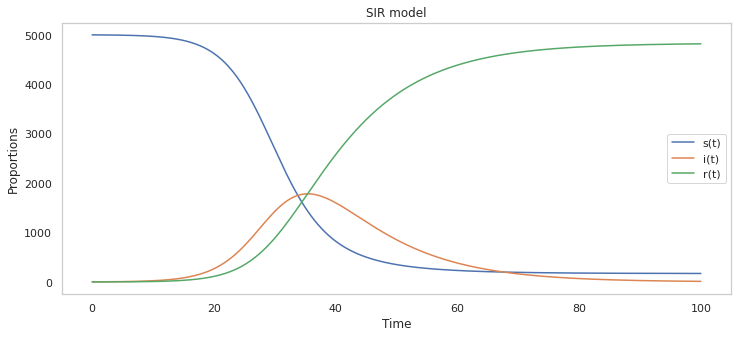

In [0]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
plt.plot(t,solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

In [0]:
# sol = solve_ivp(SIR_model,[0,14],[762,1,0],t_eval=np.arange(0,14.2,0.2))

# fig = plt.figure(figsize=(12,4))
# plt.plot(sol.t,sol.y[0])
# plt.plot(sol.t,sol.y[1])
# plt.plot(sol.t,sol.y[2])
# plt.plot(np.arange(0,15),data,"k*:")
# plt.grid("True")
# plt.legend(["Susceptible","Infected","Removed","Original Data"])

[ 7.91301665e-05 -8.32369133e-02]


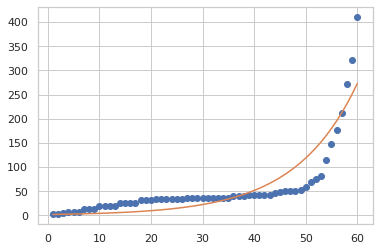

In [0]:
#TEST
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

n = 60
country= 'Thailand'
thailand_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n)&(case_report_by_counry_from_day1['Country']==country)]
x_train = thailand_cases['day'].to_numpy()
y_train = thailand_cases['Confirmed'].to_numpy()


def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_freq, (S0, I0, R0), x, args=(beta, gamma))[:,1]


S0 = 5000
I0 = 2
R0 = 0.0
N = S0 + I0 + R0
beta = 0.35
gamma = 0.1

popt, pcov = optimize.curve_fit(fit_odeint, x_train, y_train)
print(popt)
fitted = fit_odeint(x_train, popt[0],popt[1])

plt.plot(x_train, y_train, 'o')
plt.plot(x_train, fitted)
plt.show()

In [0]:
S0 = 5000
I0 = 2
R0 = 0.0
N = S0 + I0 + R0
beta = 0.000079
gamma = -0.0832

In [0]:
#Time vector
t= numpy.linspace(0,100,10000)

#Result
solution = scipy.integrate.odeint(SIR_model_freq,[S0,I0,R0],t,args=(beta,gamma))
solution = numpy.array(solution)

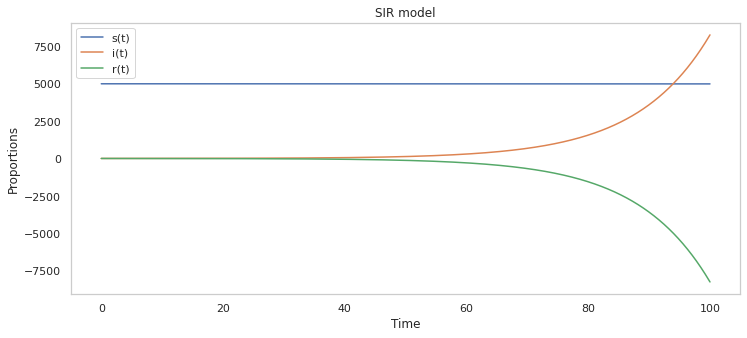

In [0]:
#plot
plt.figure(figsize=(12,5))
plt.plot(t,solution[:,0],label ="s(t)")
plt.plot(t,solution[:,1],label ="i(t)")
plt.plot(t,solution[:,2],label ="r(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

In [0]:
#Test 2

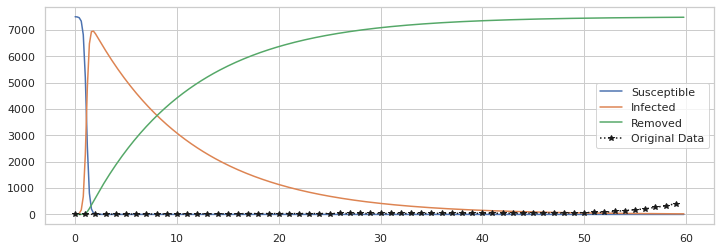

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

n = 60
country= 'Thailand'
thailand_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n)&(case_report_by_counry_from_day1['Country']==country)]
x_train = thailand_cases['day'].to_numpy()
y_train = thailand_cases['Confirmed'].to_numpy()
data = y_train
size = len(data)
# size = 120
# data =  np.concatenate((y_train, [None] * (size - len(data))))

beta,gamma = [0.001,0.1]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    N= (S+I+R)
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

sol = solve_ivp(SIR,[0,size],[7500,2,0],t_eval=np.arange(0,size,0.2))

fig = plt.figure(figsize=(12,4))
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
plt.plot(np.arange(0,size),data,"k*:")
plt.grid("True")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

In [0]:
def sumsq(p):
    beta, gamma = p
    def SIR(t,y):
      S = y[0]
      I = y[1]
      R = y[2]
      return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    sol = solve_ivp(SIR,[0,size],[15000,2,0],t_eval=np.arange(0,size,0.2))
    return(sum((sol.y[1][::5]-data)**2))

In [0]:
from scipy.optimize import minimize

# msol = minimize(sumsq,[0.001,1],method='Nelder-Mead')
msol =  minimize(
            sumsq,
            [0.001,  1],
            method='L-BFGS-B',
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
msol.x

array([0.4, 0.4])

In [0]:
beta,gamma = msol.x
def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
sol = solve_ivp(SIR,[0,size],[762,1,0],t_eval=np.arange(0,size+0.2,0.2))

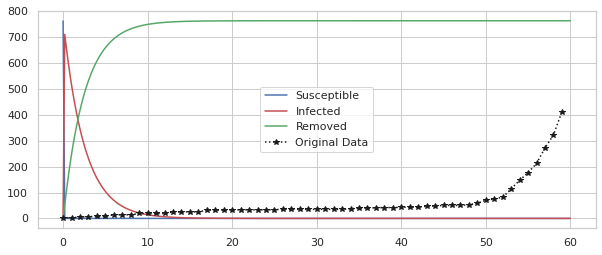

In [0]:
fig = plt.figure(figsize=(10,4))
plt.plot(sol.t,sol.y[0],"b-")
plt.plot(sol.t,sol.y[1],"r-")
plt.plot(sol.t,sol.y[2],"g-")
plt.plot(np.arange(0,size),data,"k*:")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

from [number and shape](https://numbersandshapes.net/post/fitting_sir_to_data_in_python/)

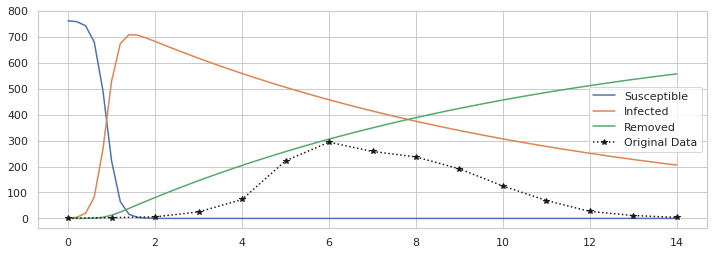

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

data = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
beta,gamma = [0.01,0.1]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

sol = solve_ivp(SIR,[0,14],[762,1,0],t_eval=np.arange(0,14.2,0.2))

fig = plt.figure(figsize=(12,4))
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
plt.plot(np.arange(0,15),data,"k*:")
plt.grid("True")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

In [0]:
def sumsq(p):
    beta, gamma = p
    def SIR(t,y):
      S = y[0]
      I = y[1]
      R = y[2]
      return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    sol = solve_ivp(SIR,[0,14],[762,1,0],t_eval=np.arange(0,14.2,0.2))
    return(sum((sol.y[1][::5]-data)**2))

In [0]:
from scipy.optimize import minimize

msol = minimize(sumsq,[0.001,1],method='Nelder-Mead')
msol.x

array([0.00218035, 0.44553886])

In [0]:
beta,gamma = msol.x
def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
sol = solve_ivp(SIR,[0,14],[762,1,0],t_eval=np.arange(0,14.2,0.2))

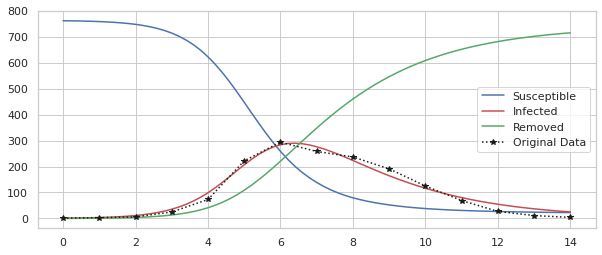

In [0]:
fig = plt.figure(figsize=(10,4))
plt.plot(sol.t,sol.y[0],"b-")
plt.plot(sol.t,sol.y[1],"r-")
plt.plot(sol.t,sol.y[2],"g-")
plt.plot(np.arange(0,15),data,"k*:")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

from [stack overflow](https://stackoverflow.com/questions/34422410/fitting-sir-model-based-on-least-squares)

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':


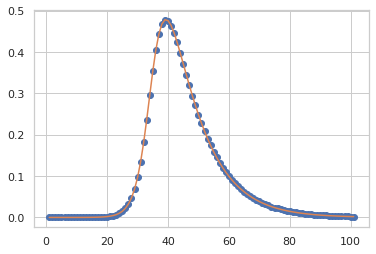

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

ydata = ['1e-06', '1.49920166169172e-06', '2.24595472686361e-06', '3.36377954575331e-06', '5.03793663882291e-06', '7.54533628058909e-06', '1.13006564683911e-05', '1.69249500601052e-05', '2.53483161761933e-05', '3.79636391699325e-05', '5.68567547875179e-05', '8.51509649182741e-05', '0.000127522555808945', '0.000189928392105942', '0.000283447055673738', '0.000423064043409294', '0.000631295993246634', '0.000941024110897193', '0.00140281896645859', '0.00209085569326554', '0.00311449589149717', '0.00463557784224762', '0.00689146863803467', '0.010227347567051', '0.0151380084180746', '0.0223233100045688', '0.0327384810150231', '0.0476330618585758', '0.0685260046667727', '0.0970432959143974', '0.134525888779423', '0.181363340075877', '0.236189247803334', '0.295374180276257', '0.353377036130714', '0.404138746080267', '0.442876028839178', '0.467273954573897', '0.477529937494976', '0.475582401936257', '0.464137179474659', '0.445930281787152', '0.423331710456602', '0.39821360956389', '0.371967226561944', '0.345577884704341', '0.319716449520481', '0.294819942458255', '0.271156813453547', '0.24887641905719', '0.228045466022105', '0.208674420183194', '0.190736203926912', '0.174179448652951', '0.158937806544529', '0.144936441326754', '0.132096533873646', '0.120338367115739', '0.10958340819268', '0.099755679236243', '0.0907826241267504', '0.0825956203546979', '0.0751302384111894', '0.0683263295744258', '0.0621279977639921', '0.0564834809370572', '0.0513449852139111', '0.0466684871328814', '0.042413516167789', '0.0385429293775096', '0.035022685071934', '0.0318216204865132', '0.0289112368382048', '0.0262654939162707', '0.0238606155312519', '0.021674906523588', '0.0196885815912485', '0.0178836058829335', '0.0162435470852779', '0.0147534385851646', '0.0133996531928511', '0.0121697868544064', '0.0110525517526551', '0.0100376781867076', '0.00911582462544914', '0.00827849534575178', '0.00751796508841916', '0.00682721019158058', '0.00619984569061827', '0.00563006790443123', '0.00511260205894446', '0.00464265452957236', '0.00421586931435123', '0.00382828837833139', '0.00347631553734708', '0.00315668357532714', '0.00286642431380459', '0.00260284137520731', '0.00236348540287827', '0.00214613152062159', '0.00194875883295343']
xdata = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101']

ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

def sir_model(y, x, beta, gamma):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    I = -(S + R)
    return S, I, R

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

N = 1.0
I0 = ydata[0]
S0 = N - I0
R0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.show()

In [0]:
#TEST2

from [here](https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html)

In [0]:
### make it works

In [0]:
def loss(point, data):
    """
    RMSE between actual confirmed cases and the estimated infectious people with given beta and gamma.
    """
    S_0 = 60000000
    I_0 = 2
    R_0 = 0
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        N = S + I +R
        return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))
def train():
        """
        Run the optimization to estimate the beta and gamma fitting the given confirmed cases.
        """
        # data = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
        country= 'Thailand'
        thailand_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n)&(case_report_by_counry_from_day1['Country']==country)]
        x_train = thailand_cases['day'].to_numpy()
        y_train = thailand_cases['Confirmed'].to_numpy()
        data = y_train
        optimal = minimize(
            loss,
            [0.001, 0.001],
            args=(data),
            method='L-BFGS-B',
            bounds=[(0.1, 0.4), (0.05, 0.4)]
        )
        beta, gamma = optimal.x
        print('beta = '+str(beta)+ 'gamma = '+str(gamma))
        extended_actual, prediction = predict(beta, gamma, data)
        df = pd.DataFrame({
            'Actual': extended_actual,
            'S': prediction.y[0],
            'I': prediction.y[1],
            'R': prediction.y[2]
        })
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title('Thailand')
        df.plot(ax=ax)
def predict(beta, gamma, data):
        """
        Predict how the number of people in each compartment can be changed through time toward the future.
        The model is formulated with the given beta and gamma.
        """
        predict_range = 200
        size = predict_range
        S_0 = 10000
        I_0 = 2
        R_0 = 0
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            N = S + I +R
            return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
        extended_actual = np.concatenate((data, [None] * (size - len(data))))
        return extended_actual, solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 1))

beta = 0.13332262664903263gamma = 0.05


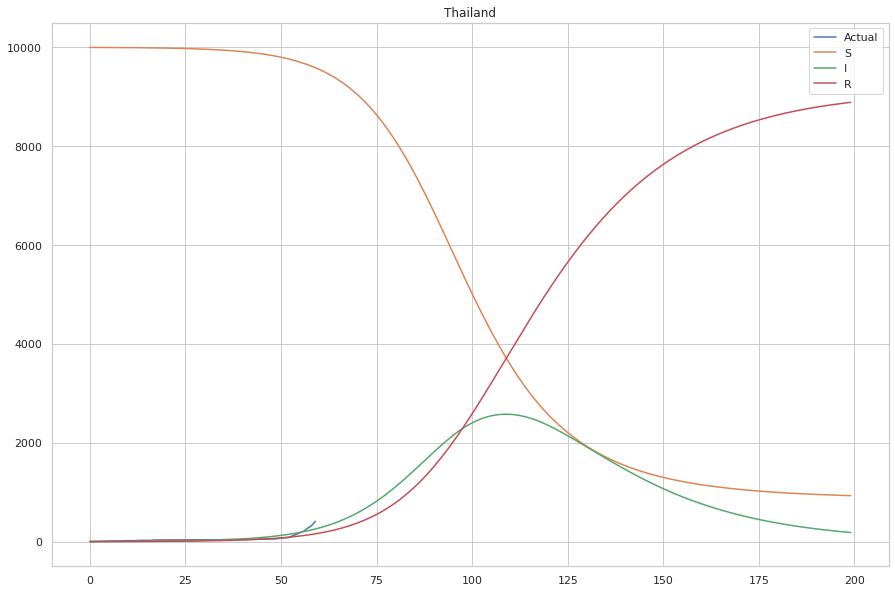

In [0]:
train()


beta = 0.13332262664903263gamma = 0.05


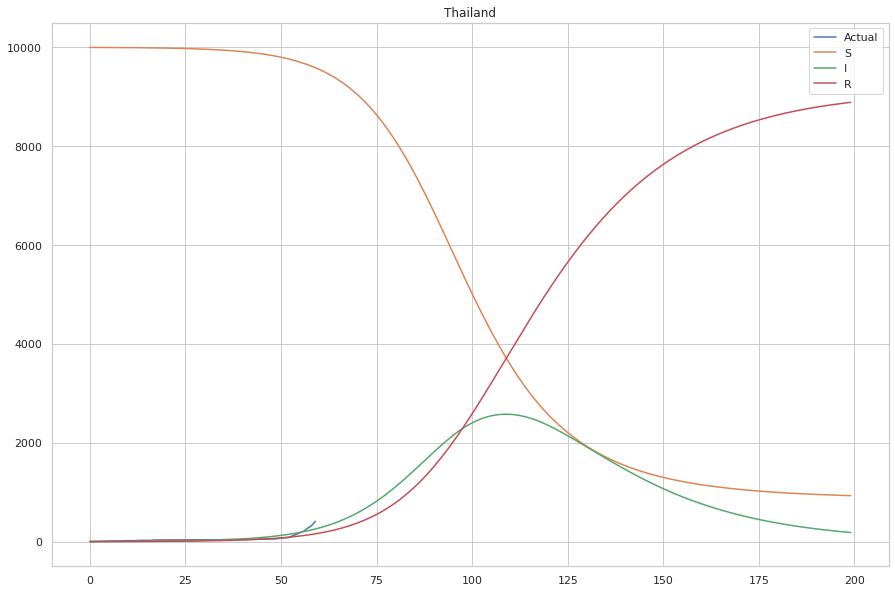

In [0]:
train()
